<a href="https://colab.research.google.com/github/YayunEldina/PEMB_MESIN_Ganjil_2024/blob/main/Jobsheet_11_Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JOBSHEET 11**

- **Nama  : Yayun Eldina**
- **NIM   : 2241720065**
- **Kelas : TI-3F**

## **Praktikum 1 - Klasifikasi Cat dan Dog**

### **Langkah 1 - Import Library**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


#### **Langkah 2.1. Pra Pengolahan Data Training**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ML_2024/pertemuan_11/dataset/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


#### **Langkah 2.2. Pra Pengolahan Data Testing**

In [4]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ML_2024/pertemuan_11/dataset/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


### **Langkah 3 - Pembuatan Model CNN**

#### **Langkah 3.1. - Inisiasi Model CNN**

In [5]:
cnn = tf.keras.models.Sequential()

#### **Langkah 3.2. - Pembuatan Layer Konvolusi 1**

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

#### **Langkah 3.3 - Pembuatan Layer Pooling 1**

In [8]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### **Langkah 3.4 - Pembuatan Layer Konvolusi 2 dan Pooling 2**

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

#### **Langkah 3.5 - Flattening**

In [10]:
cnn.add(tf.keras.layers.Flatten())

#### **Langkah 3.6 - Fully Connected Layer 1 (Input)**

In [11]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

#### **Langkah 3.7 - Fully Connected Layer 2 (Output)**

In [12]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

#### **Langkah 3.8 - Compile Model CNN**

In [13]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### **Langkah 4 - Fit CNN**

In [15]:
cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 1335s 5s/step - accuracy: 0.5383 - loss: 0.6923 - val_accuracy: 0.6860 - val_loss: 0.6124
Epoch 2/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 172s 651ms/step - accuracy: 0.6786 - loss: 0.5975 - val_accuracy: 0.7365 - val_loss: 0.5521
Epoch 3/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 153s 604ms/step - accuracy: 0.7221 - loss: 0.5455 - val_accuracy: 0.7290 - val_loss: 0.5405
Epoch 4/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 159s 630ms/step - accuracy: 0.7489 - loss: 0.5214 - val_accuracy: 0.7555 - val_loss: 0.5187
Epoch 5/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 193s 593ms/step - accuracy: 0.7613 - loss: 0.4878 - val_accuracy: 0.7655 - val_loss: 0.5000
Epoch 6/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 157s 621ms/step - accuracy: 0.7793 - loss: 0.4624 - val_accuracy: 0.7460 - val_loss: 0.5268
Epoch 7/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 194s 589ms/step - accuracy: 0.7976 - loss: 0.4382 - val_accuracy: 0.7530 - val_loss: 0.5039
Epoch 8/25
250/250 ━━━━━━━━━━━━━━━━━━━━ 150s 591ms/step - accuracy: 0.8018 - l

### **Langkah 5 - Prediksi dengan 1 Citra**

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/ML_2024/pertemuan_11/dataset/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


## **Praktikum 2 - Klasifikasi Multi-label dengan Data CIFAT**

### **Langkah 1 - Load Library**

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### **Langkah 2 - Unduh Dataset CIFAR**

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### **Langkah 3 - Verifikasi Data**

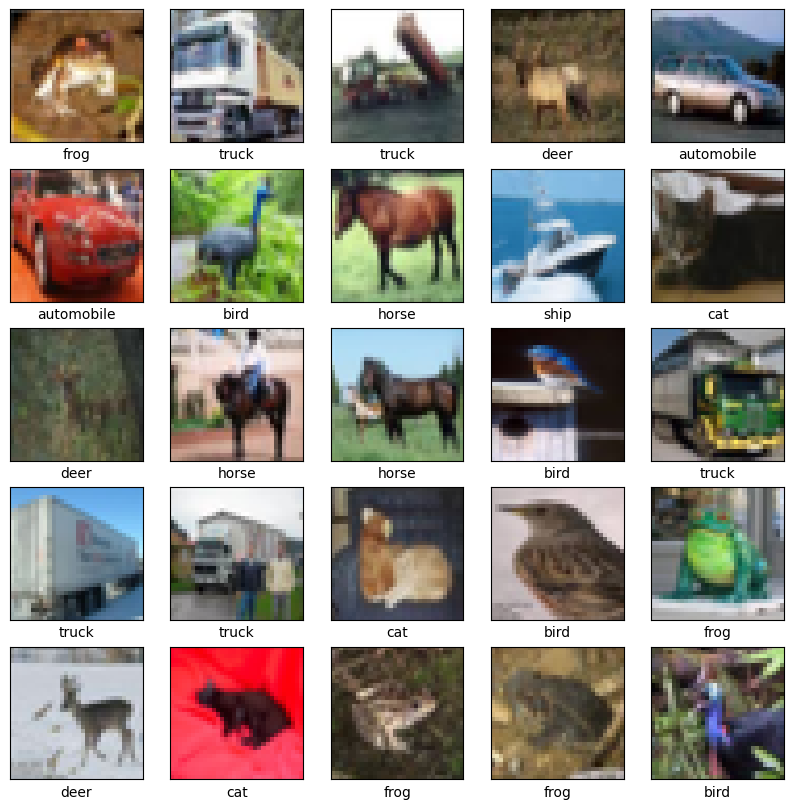

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
       'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which is why you need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### **Langkah 4 - Buat Model CNN**

#### **Langkah 4.1. - Buat Layer Konvolusi**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### **Langkah 4.2. - Cek Arsitektur Konvolusi**

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,320 (220.00 KB)

 Trainable params: 56,320 (220.00 KB)

 Non-trainable params: 0 (0.00 B)

#### **Langkah 4.3. - Tambahkan Layer Fully Connected**

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#### **Langkah 4.4. - Cek Arsitektur Model CNN**

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

#### **Langkah 4.5. - Compile Model CNN**

In [ ]:
model.compile(optimizer='adam',
       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
       metrics=['accuracy'])

### **Langkah 5 - Fit Model**

In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 50ms/step - accuracy: 0.3519 - loss: 1.7496 - val_accuracy: 0.5405 - val_loss: 1.2753
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 53ms/step - accuracy: 0.5678 - loss: 1.2106 - val_accuracy: 0.5879 - val_loss: 1.1665
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 49ms/step - accuracy: 0.6257 - loss: 1.0576 - val_accuracy: 0.6458 - val_loss: 1.0063
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.6632 - loss: 0.9537 - val_accuracy: 0.6549 - val_loss: 0.9972
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 51ms/step - accuracy: 0.6953 - loss: 0.8732 - val_accuracy: 0.6677 - val_loss: 0.9707
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 48ms/step - accuracy: 0.7183 - loss: 0.8088 - val_accuracy: 0.6912 - val_loss: 0.8761
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 76s 49ms/step - accuracy: 0.7372 - loss: 0.7589 - val_accuracy: 0.6974 - val_loss: 0.8739
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.7558 

### **Langkah 6 - Evaluasi Model**

313/313 - 4s - 12ms/step - accuracy: 0.7033 - loss: 0.8971


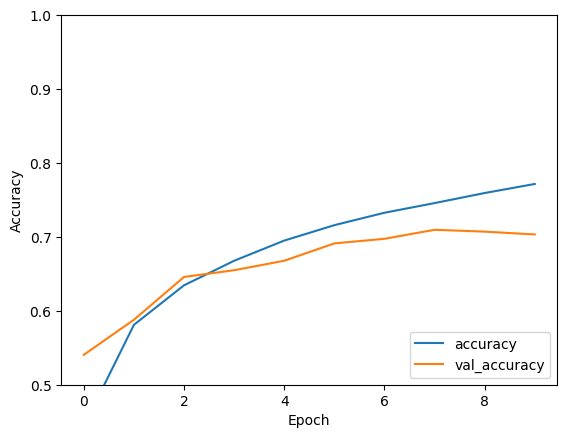

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

### **Langkah 7 - Cetak Hasil Akurasi**

In [ ]:
print(test_acc)

0.7032999992370605


### **Tugas Praktikum**

1. Melakukan odifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

#### **Langkah 1 - Load Library**

In [11]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

#### **Langkah 2 - Unduh Dataset CIFAR**

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

#### **Langkah 3 - Verifikasi Data**

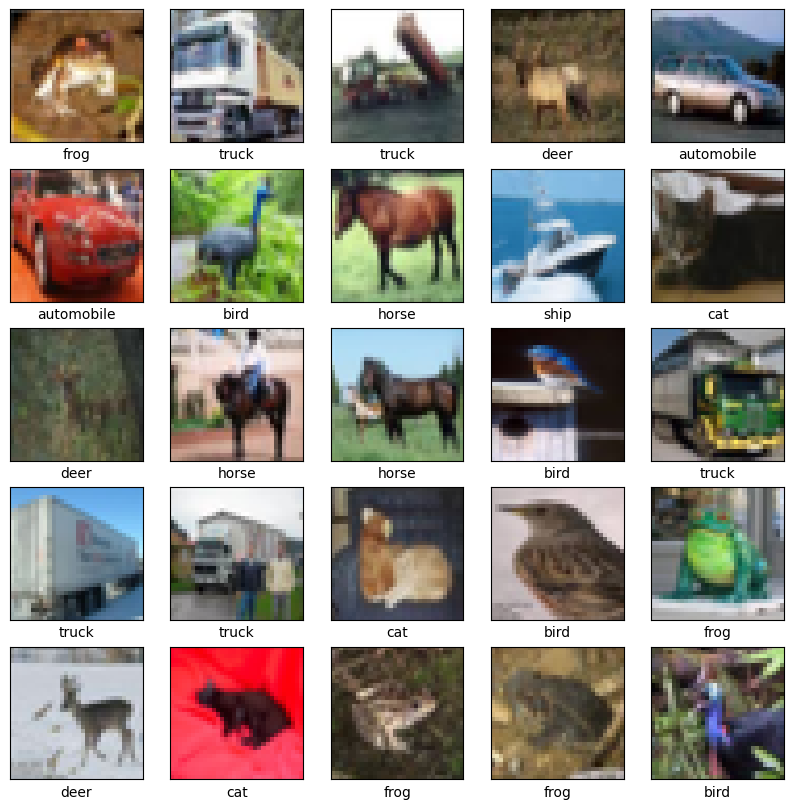

In [13]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

#### **Langkah 4 - Buat Model CNN**

##### **Langkah 4.1. - Buat Layer Konvolusi**

In [14]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,(3,3),input_shape=(32,32,3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(units = 10, activation = 'softmax'))

##### **Langkah 4.2. - Cek Arsitektur Konvolusi**

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 309,290 (1.18 MB)

 Trainable params: 308,394 (1.18 MB)

 Non-trainable params: 896 (3.50 KB)

##### **Langkah 4.3. - Compile Model CNN**

In [16]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Langkah 5 - Fit Model**

In [18]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
# Train the model with callbacks
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels),
                    callbacks=[early_stopping])

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 454s 291ms/step - accuracy: 0.3424 - loss: 2.4716 - val_accuracy: 0.5296 - val_loss: 1.4123
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 482s 278ms/step - accuracy: 0.5307 - loss: 1.4107 - val_accuracy: 0.6153 - val_loss: 1.0975
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 442s 278ms/step - accuracy: 0.6125 - loss: 1.1354 - val_accuracy: 0.6636 - val_loss: 0.9684
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 438s 275ms/step - accuracy: 0.6599 - loss: 0.9779 - val_accuracy: 0.6708 - val_loss: 0.9451
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 433s 277ms/step - accuracy: 0.6987 - loss: 0.8730 - val_accuracy: 0.6207 - val_loss: 1.1946
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 447s 280ms/step - accuracy: 0.7244 - loss: 0.8017 - val_accuracy: 0.7443 - val_loss: 0.7281
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 432s 273ms/step - accuracy: 0.7353 - loss: 0.7588 - val_accuracy: 0.7478 - val_loss: 0.7363
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 429s 265ms/step - ac

#### **Langkah 6 - Evaluasi Model**

313/313 - 17s - 55ms/step - accuracy: 0.8138 - loss: 0.5571


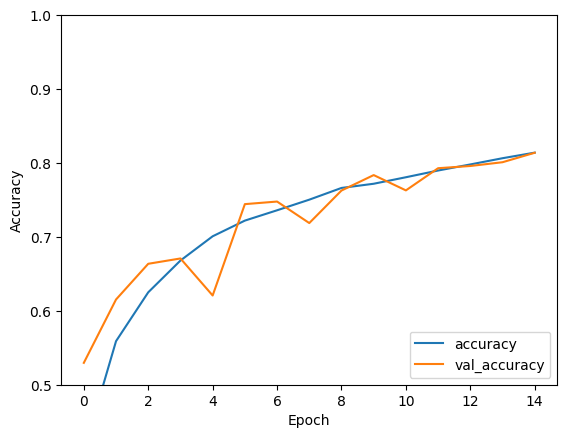

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

#### **Langkah 7 - Cetak Hasil Akurasi**

In [20]:
print(test_acc)

0.8137999773025513


2. Buatlah model CNN untuk klasifikasi dataset MNIST.

#### **Langkah 1 - Load library**

In [21]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras import layers
from keras import backend as k

#### **Langkah 2 - Load Data**

In [22]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


#### **Langkah 3 - Normalisasi Dataset**

In [23]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)

else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

#### **Langkah 4 - Build Model**

In [24]:
model_mnist = models.Sequential()

model_mnist.add(layers.Conv2D(32, kernel_size=(3,3), input_shape=inpx, activation='elu'))
model_mnist.add(layers.Conv2D(64, kernel_size=(3,3), activation='elu'))
model_mnist.add(layers.MaxPooling2D(pool_size=(3,3)))
model_mnist.add(layers.Dropout(0.5))
model_mnist.add(layers.Flatten())
model_mnist.add(layers.Dense(256, activation='sigmoid'))
model_mnist.add(layers.Dense(10, activation='softmax'))

model_mnist.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │       1,048,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,070,218 (4.08 MB)

 Trainable params: 1,070,218 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

#### **Langkah 5 - Compile Model MNIST**

In [25]:
model_mnist.compile(optimizer="adam",
                    loss="sparse_categorical_crossentropy",
                    metrics=['accuracy'])

#### **Langkah 6 - Fit Model**

In [26]:
history = model_mnist.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 160s 85ms/step - accuracy: 0.9102 - loss: 0.2886 - val_accuracy: 0.9833 - val_loss: 0.0531
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 201s 84ms/step - accuracy: 0.9828 - loss: 0.0562 - val_accuracy: 0.9884 - val_loss: 0.0352
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 206s 86ms/step - accuracy: 0.9876 - loss: 0.0413 - val_accuracy: 0.9876 - val_loss: 0.0374
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 195s 82ms/step - accuracy: 0.9887 - loss: 0.0364 - val_accuracy: 0.9893 - val_loss: 0.0327
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 150s 80ms/step - accuracy: 0.9903 - loss: 0.0297 - val_accuracy: 0.9892 - val_loss: 0.0333
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 154s 82ms/step - accuracy: 0.9916 - loss: 0.0283 - val_accuracy: 0.9895 - val_loss: 0.0325
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 205s 84ms/step - accuracy: 0.9908 - loss: 0.0278 - val_accuracy: 0.9892 - val_loss: 0.0323
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 198s 82ms/step - accuracy: 

#### **Langkah 7 - Evaluasi Model**

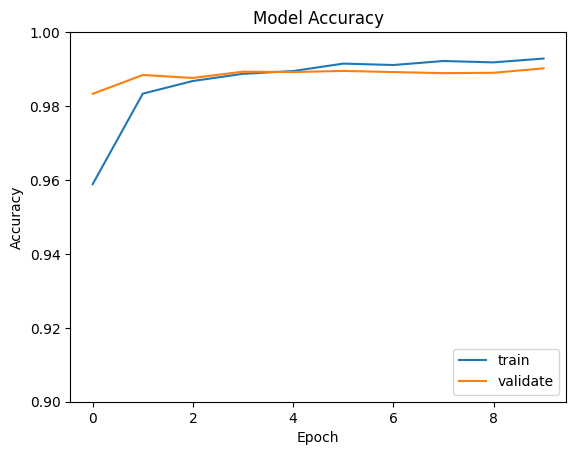

In [27]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label = 'validate')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.title("Model Accuracy")
plt.show()

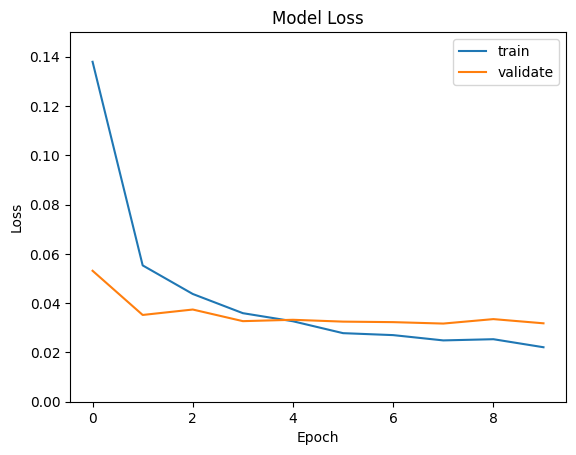

In [28]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'validate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.15])
plt.legend(loc='upper right')
plt.title("Model Loss")
plt.show()

#### **Langkah 8 - Cek Hasil Akurasi**


In [29]:
print(f"Akurasi: {history.history['val_accuracy'][-1]:.4f}")

Akurasi: 0.9902
